In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import scipy.signal as sc
import scipy.stats as stats

In [2]:
import sys
sys.path.insert(0, r'C:/Users/Angie Michaiel/Documents/GitHub/FreelyMovingEphys')
from util.paths import find
from project_analysis.ephys.ephys_utils import load_ephys
from project_analysis.doi.doi_utils import doi_saline_label
from project_analysis.doi.doi_utils import pre_post_label
from project_analysis.doi.doi_utils import label_doi_conditions

In [3]:
# load data from days of recordings 
data_path = r'\\kraken\Z\freely_moving_ephys'
dates = ['021621','021721']
data = load_ephys(data_path,dates)


In [4]:
#Dictonary of conditions
conditions = {}
conditions['doi_saline'] = {'doi_dates':['021621'],'saline_dates':['021721']}
conditions['pre_post'] = {'pre_dates':[],'post_dates':['021721']}
print(conditions)



{'doi_saline': {'doi_dates': ['021621'], 'saline_dates': ['021721']}, 'pre_post': {'pre_dates': [], 'post_dates': ['021721']}}


In [5]:
# Add conditions to data_dataframe 
pd.set_option('display.max_rows', None)
conditions_df = label_doi_conditions(data,conditions)


In [6]:
goodcells_df = conditions_df.loc[conditions_df['KSLabel']=='good']
goodcells_df= goodcells_df[:-1]
goodcells_df.dtypes
#conditions_df['hf1_wn_n_spikes']

Amplitude                                                 float64
ContamPct                                                 float64
KSLabel                                                    object
amp                                                       float64
ch                                                          int64
depth                                                       int64
fr                                                        float64
group                                                      object
fm1_n_spikes                                                int64
sh                                                          int64
waveform                                                   object
fm1_spikeT                                                 object
t0                                                        float64
fm1_spikeTraw                                              object
fm1_rate                                                   object
fm1_c_rang

In [7]:
#Add column of Total time of recordings as total seconds
goodcells_df['Tsec_fm1'] = goodcells_df['fm1_spikeTraw'].str[-1]
goodcells_df['Tsec_fm2'] = goodcells_df['fm2_spikeTraw'].str[-1]
goodcells_df['Tsec_hf1'] = goodcells_df['hf1_wn_spikeTraw'].str[-1]
goodcells_df['Tsec_hf8'] = goodcells_df['hf8_wn_spikeTraw'].str[-1]
goodcells_df['Tsec_hf2'] = goodcells_df['hf2_sprasenoiseflash_spikeTraw'].str[-1]
goodcells_df['Tsec_hf7'] = goodcells_df['hf7_sprasenoiseflash_spikeTraw'].str[-1]
goodcells_df['Tsec_hf3'] = goodcells_df['hf3_gratings_spikeTraw'].str[-1]
goodcells_df['Tsec_hf6'] = goodcells_df['hf6_gratings_spikeTraw'].str[-1]



In [8]:
# Make colums for nspikes per recording
goodcells_df['Tspikes_fm1']=goodcells_df['fm1_spikeT'].apply(len)
goodcells_df['Tspikes_fm2']=goodcells_df['fm2_spikeT'].apply(len)
goodcells_df['Tspikes_hf1']=goodcells_df['hf1_wn_spikeT'].apply(len)
goodcells_df['Tspikes_hf8']=goodcells_df['hf8_wn_spikeT'].apply(len)
goodcells_df['Tspikes_hf2']=goodcells_df['hf2_sprasenoiseflash_spikeT'].apply(len)
goodcells_df['Tspikes_hf7']=goodcells_df['hf7_sprasenoiseflash_spikeT'].apply(len)
goodcells_df['Tspikes_hf3']=goodcells_df['hf3_gratings_spikeT'].apply(len)
goodcells_df['Tspikes_hf6']=goodcells_df['hf6_gratings_spikeT'].apply(len)


In [9]:
#Calculate mean firing rate
goodcells_df['meanfr_fm1'] = goodcells_df['Tspikes_fm1']/goodcells_df['Tsec_fm1']
goodcells_df['meanfr_fm2'] = goodcells_df['Tspikes_fm2']/goodcells_df['Tsec_fm2']
goodcells_df['meanfr_hf1'] = goodcells_df['Tspikes_hf1']/goodcells_df['Tsec_hf1']
goodcells_df['meanfr_hf8'] = goodcells_df['Tspikes_hf8']/goodcells_df['Tsec_hf8']
goodcells_df['meanfr_hf2'] = goodcells_df['Tspikes_hf2']/goodcells_df['Tsec_hf2']
goodcells_df['meanfr_hf7'] = goodcells_df['Tspikes_hf7']/goodcells_df['Tsec_hf7']
goodcells_df['meanfr_hf3'] = goodcells_df['Tspikes_hf3']/goodcells_df['Tsec_hf3']
goodcells_df['meanfr_hf6'] = goodcells_df['Tspikes_hf6']/goodcells_df['Tsec_hf6']


In [10]:
#goodcells_df.dtypes

In [11]:
#Dataframes of DOI and saline groups
doi_df = goodcells_df.loc[goodcells_df['hf7_sprasenoiseflashdoi/saline']=='doi']
doi_df=doi_df[:-2]
doi_df=doi_df.drop([49,67,76])
saline_df = goodcells_df.loc[goodcells_df['hf7_sprasenoiseflashdoi/saline']=='saline']
#print(saline_df)

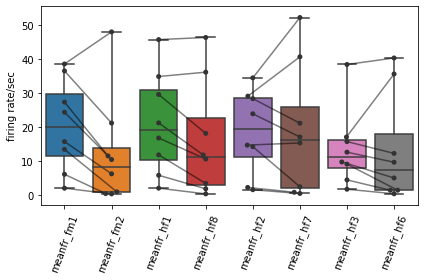

In [12]:
#plot doi fr  
fig, ax = plt.subplots()
frdoi = sns.swarmplot(data=doi_df[doi_df.columns[-8:]],ax=ax,color=".2") 
frdoi = sns.boxplot(data=doi_df[doi_df.columns[-8:]], whis=np.inf)
plt.xticks(rotation=70)
plt.ylabel('firing rate/sec')
plt.tight_layout()
#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5
idx6 = 6
idx7 = 7

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
locs7 = ax.get_children()[idx6].get_offsets()
locs8 = ax.get_children()[idx7].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs7.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs4.shape[0]):
    x = [locs7[i, 0], locs8[i, 0]]
    y = [locs7[i, 1], locs8[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

#plt.savefig('doi_avgfr.png')
    

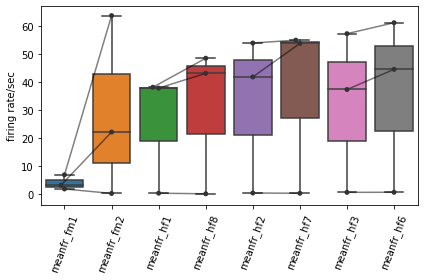

In [13]:
#plot saline 
fig, ax = plt.subplots()
frsaline = sns.swarmplot( data=saline_df[doi_df.columns[-8:]],color='.2') 
frsaline = sns.boxplot(data=saline_df[doi_df.columns[-8:]], whis=np.inf) 
plt.xticks(rotation=70)
plt.ylabel('firing rate/sec')
plt.tight_layout()

#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5
idx6 = 6
idx7 = 7


#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
locs7 = ax.get_children()[idx6].get_offsets()
locs8 = ax.get_children()[idx7].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs7.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs4.shape[0]):
    x = [locs7[i, 0], locs8[i, 0]]
    y = [locs7[i, 1], locs8[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

    
#plt.savefig('saline_avgfr.png')



In [14]:
#grating psth analysis doi 
# Create psth_df for doi  
doi_df['maxpsth_hf3']=doi_df['hf3_gratings_grating_psth'].apply(max)
doi_df['maxpsth_hf6']=doi_df['hf6_gratings_grating_psth'].apply(max)
doi_df['maxpsth']=doi_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthdoi_df=doi_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]

#Calculate normalized psth
psthdoi_df['normalizedpsth_pre']=psthdoi_df['hf3_gratings_grating_psth']/psthdoi_df['maxpsth']
psthdoi_df['normalizedpsth_post']=psthdoi_df['hf6_gratings_grating_psth']/psthdoi_df['maxpsth']

#Calculate meanpsth
psthdoi_df['meanpsth_pre']=psthdoi_df['normalizedpsth_pre'].apply(np.mean)
psthdoi_df['meanpsth_post']=psthdoi_df['normalizedpsth_post'].apply(np.mean)

#print(psthdoi_df)


C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

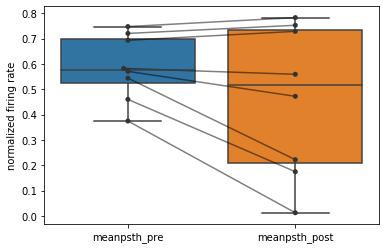

In [15]:
#plot doi PSTH 
fig, ax = plt.subplots()
psthdoi = sns.swarmplot(data=psthdoi_df[psthdoi_df.columns[-2:]],ax=ax,color=".2") 
psthdoi = sns.boxplot(data=psthdoi_df[psthdoi_df.columns[-2:]], whis=np.inf)
plt.ylabel('normalized firing rate')

#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
#plt.savefig('psth_doi.png')


In [16]:
#grating psth analysis saline 
# Create psth_df for saline  
saline_df['maxpsth_hf3']=saline_df['hf3_gratings_grating_psth'].apply(max)
saline_df['maxpsth_hf6']=saline_df['hf6_gratings_grating_psth'].apply(max)
saline_df['maxpsth']=saline_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthsaline_df=saline_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]


#Calculate normalized psth
psthsaline_df['normalizedpsth_pre']=psthsaline_df['hf3_gratings_grating_psth']/psthsaline_df['maxpsth']
psthsaline_df['normalizedpsth_post']=psthsaline_df['hf6_gratings_grating_psth']/psthsaline_df['maxpsth']

#Calculate meanpsth
psthsaline_df['meanpsth_pre']=psthsaline_df['normalizedpsth_pre'].apply(np.mean)
psthsaline_df['meanpsth_post']=psthsaline_df['normalizedpsth_post'].apply(np.mean)





C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

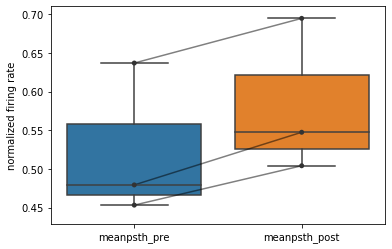

In [17]:
#plot doi PSTH 
fig, ax = plt.subplots()
psthsaline = sns.swarmplot(data=psthsaline_df[psthsaline_df.columns[-2:]],ax=ax,color=".2") 
psthsaline = sns.boxplot(data=psthsaline_df[psthsaline_df.columns[-2:]], whis=np.inf)
plt.ylabel('normalized firing rate')


#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
#plt.savefig('psth_saline.png')

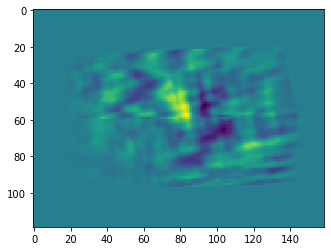

In [18]:
for index, row in doi_df.iterrows():
    if index== 8:
        sta1 = np.reshape(row['hf1_wn_spike_triggered_average'],tuple(row['hf1_wn_sta_shape']))
        sta2 = np.reshape(row['hf8_wn_spike_triggered_average'],tuple(row['hf8_wn_sta_shape']))
        plt.imshow(sc.correlate2d(sta1,sta2))

In [19]:
doi_stacorr = []
for index, row in doi_df.iterrows():
    sta1 = np.reshape(row['hf1_wn_spike_triggered_average'],tuple(row['hf1_wn_sta_shape']))
    sta2 = np.reshape(row['hf8_wn_spike_triggered_average'],tuple(row['hf8_wn_sta_shape']))
    doi_stacorr.append(stats.pearsonr(sta1.flatten(),sta2.flatten())[0])
    
saline_stacorr = []
for index, row in saline_df.iterrows():
    sta1 = np.reshape(row['hf1_wn_spike_triggered_average'],tuple(row['hf1_wn_sta_shape']))
    sta2 = np.reshape(row['hf8_wn_spike_triggered_average'],tuple(row['hf8_wn_sta_shape']))
    saline_stacorr.append(stats.pearsonr(sta1.flatten(),sta2.flatten())[0])

Text(0, 0.5, 'STA corr coeff')

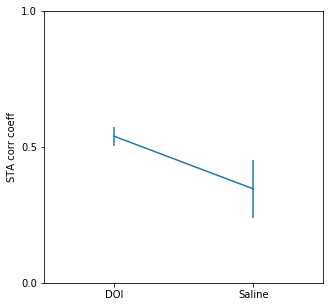

In [20]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.errorbar([0,1],[np.mean(doi_stacorr),np.mean(saline_stacorr)],
             [np.std(doi_stacorr)/len(doi_stacorr),np.std(saline_stacorr)/len(saline_stacorr)])
ax.axis([-0.5,1.5,0,1])
ax.set_yticks(np.arange(0,1.5,0.5))
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('STA corr coeff')

In [21]:
stats.pearsonr(sta1.flatten(),sta2.flatten())

(-0.05237352053824476, 0.00028332213439775656)

In [22]:
#psthdoi_df=psthdoi_df[:-2]
psthdoi_df=psthdoi_df
psthdoi_df['hf3_gratings_grating_psth'].apply(np.mean)



5      9.432609
8     15.597826
17    34.080435
21    18.617391
56     8.965217
57     1.545652
59    12.943478
61     3.800000
Name: hf3_gratings_grating_psth, dtype: float64

In [23]:
#psthsaline_df=psthsaline_df.drop([107])
psthsaline_df['hf3_gratings_grating_psth'].apply(np.mean)

55     37.054612
56     53.195388
107     0.651699
Name: hf3_gratings_grating_psth, dtype: float64

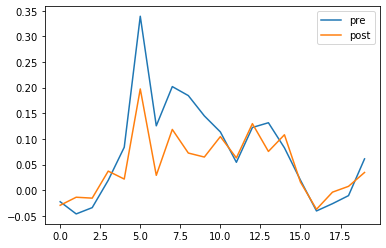

In [24]:
psthpre_acrosscell=psthdoi_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthdoi_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')
plt.legend()
plt.savefig('doipsth.png')

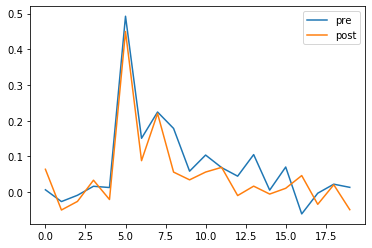

In [25]:
psthpre_acrosscell=psthsaline_df['normalizedpsth_pre'].mean()
psthpost_acrosscell=psthsaline_df['normalizedpsth_post'].mean()
pre_baseline = np.mean(psthpre_acrosscell[:5])
post_baseline=np.mean(psthpost_acrosscell[:5])

plt.plot(psthpre_acrosscell-pre_baseline,label='pre')
plt.plot(psthpost_acrosscell-post_baseline,label='post')
plt.legend()
plt.savefig('salinepsth.png')

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


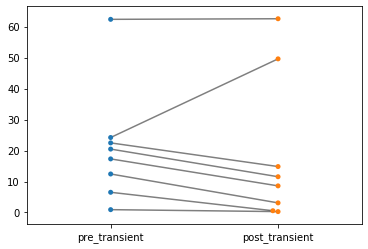

In [26]:

psthdoi_df['pre_transient'] = psthdoi_df['hf3_gratings_grating_psth'].str[5]
psthdoi_df['post_transient'] = psthdoi_df['hf6_gratings_grating_psth'].str[5]

fig, ax = plt.subplots()
sns.swarmplot(data=psthdoi_df[psthdoi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


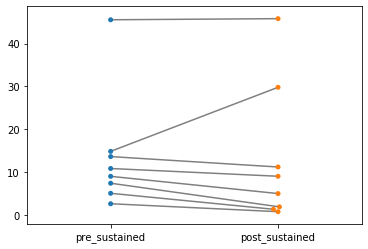

In [29]:

psthdoi_df['pre_sustained'] = psthdoi_df['hf3_gratings_grating_psth'].str[13]
psthdoi_df['post_sustained'] = psthdoi_df['hf6_gratings_grating_psth'].str[13]

fig, ax = plt.subplots()
sns.swarmplot(data=psthdoi_df[psthdoi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


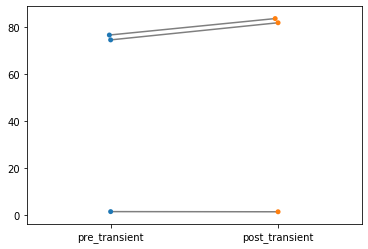

In [47]:
psthsaline_df['pre_transient'] = psthsaline_df['hf3_gratings_grating_psth'].str[5]
psthsaline_df['post_transient'] = psthsaline_df['hf6_gratings_grating_psth'].str[5]

fig, ax = plt.subplots()
sns.swarmplot(data=psthsaline_df[psthsaline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


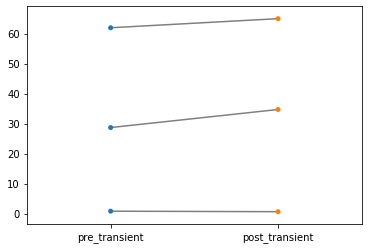

In [48]:
psthsaline_df['pre_transient'] = psthsaline_df['hf3_gratings_grating_psth'].str[13]
psthsaline_df['post_transient'] = psthsaline_df['hf6_gratings_grating_psth'].str[13]

fig, ax = plt.subplots()
sns.swarmplot(data=psthsaline_df[psthsaline_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

In [ ]:
psthdoi_df['pre_transient'] = psthdoi_df['hf3_gratings_grating_psth'].str[5]
psthdoi_df['post_transient'] = psthdoi_df['hf6_gratings_grating_psth'].str[5]

fig, ax = plt.subplots()
sns.swarmplot(data=psthdoi_df[psthdoi_df.columns[-2:]],ax=ax)
#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

In [42]:
psthdoi_df['hf3_gratings_grating_psth'].str[13]

5      7.434783
8     14.869565
17    45.565217
21    13.652174
56     9.043478
57     2.652174
59    10.869565
61     5.086957
Name: hf3_gratings_grating_psth, dtype: float64

In [41]:
psthdoi_df['hf6_gratings_grating_psth'].str[13]

5      5.023474
8      0.798122
17    45.821596
21    29.812207
56     9.061033
57     1.924883
59    11.220657
61     1.361502
Name: hf6_gratings_grating_psth, dtype: float64

[0, 1, 0, 1]

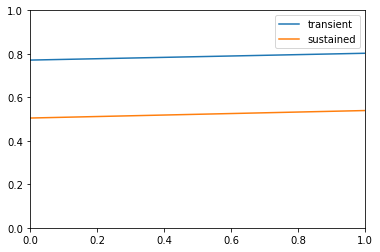

In [30]:
transient = [5,6]
sustained = [13,14]
plt.plot([0,1],[np.mean(psthpre_acrosscell[transient]),np.mean(psthpost_acrosscell[transient])],label='transient')
plt.plot([0,1],[np.mean(psthpre_acrosscell[sustained]),np.mean(psthpost_acrosscell[sustained])],label='sustained')
plt.legend()
plt.axis([0,1,0,1])

In [31]:
from scipy import stats
#get crf for all unit (2D array, cells X timepts)
#run stats.pearsonr on each individual unit, get 1d array of r values for all cells
#plot r values (mean and sem) for doi and saline
stats.pearsonr(psthpre_acrosscell,psthpost_acrosscell)[0] #0 gets you r value, 1 gets you p value

0.91217533786916

[0, 1, 0, 1]

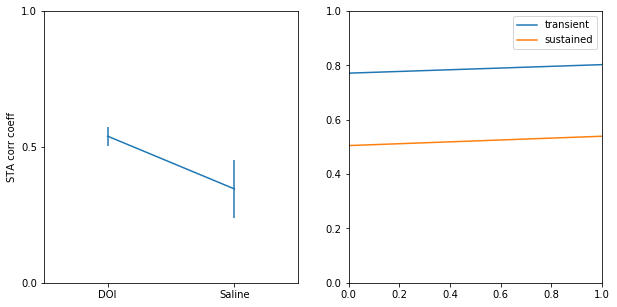

In [32]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]
ax.errorbar([0,1],[np.mean(doi_stacorr),np.mean(saline_stacorr)],
             [np.std(doi_stacorr)/len(doi_stacorr),np.std(saline_stacorr)/len(saline_stacorr)])
ax.axis([-0.5,1.5,0,1])
ax.set_yticks(np.arange(0,1.5,0.5))
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('STA corr coeff')

ax = axs[1]
ax.plot([0,1],[np.mean(psthpre_acrosscell[transient]),np.mean(psthpost_acrosscell[transient])],label='transient')
ax.plot([0,1],[np.mean(psthpre_acrosscell[sustained]),np.mean(psthpost_acrosscell[sustained])],label='sustained')
ax.legend()
ax.axis([0,1,0,1])

In [33]:
doi_df.dtypes

Amplitude                                                 float64
ContamPct                                                 float64
KSLabel                                                    object
amp                                                       float64
ch                                                          int64
depth                                                       int64
fr                                                        float64
group                                                      object
fm1_n_spikes                                                int64
sh                                                          int64
waveform                                                   object
fm1_spikeT                                                 object
t0                                                        float64
fm1_spikeTraw                                              object
fm1_rate                                                   object
fm1_c_rang

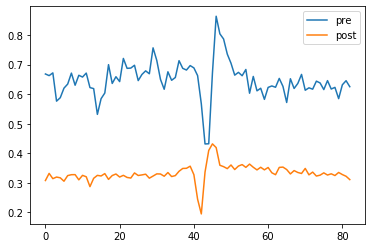

In [34]:
doi_df['pre_max_upsacc_avg']=doi_df['fm1_upsacc_avg'].apply(max)
doi_df['post_max_upsacc_avg']=doi_df['fm2_upsacc_avg'].apply(max)
doi_df['max_upsacc_avg']=doi_df[['pre_max_upsacc_avg','post_max_upsacc_avg']].max(axis=1)
doi_df['normalized_upsacc_avg_pre']=doi_df['fm1_upsacc_avg']/doi_df['max_upsacc_avg']
doi_df['normalizedupsacc_avg_post']=doi_df['fm2_upsacc_avg']/doi_df['max_upsacc_avg']

pre=doi_df['normalized_upsacc_avg_pre'].mean()
post=doi_df['normalizedupsacc_avg_post'].mean()

plt.plot(pre,label ='pre')
plt.plot(post,label ='post')
plt.legend()

C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

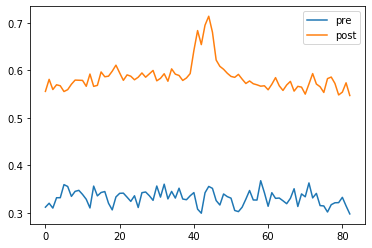

In [35]:
saline_df['pre_max_upsacc_avg']=saline_df['fm1_upsacc_avg'].apply(max)
saline_df['post_max_upsacc_avg']=saline_df['fm2_upsacc_avg'].apply(max)
saline_df['max_upsacc_avg']=saline_df[['pre_max_upsacc_avg','post_max_upsacc_avg']].max(axis=1)
saline_df['normalized_upsacc_avg_pre']=saline_df['fm1_upsacc_avg']/saline_df['max_upsacc_avg']
saline_df['normalizedupsacc_avg_post']=saline_df['fm2_upsacc_avg']/saline_df['max_upsacc_avg']


pre=saline_df['normalized_upsacc_avg_pre'].mean()
post=saline_df['normalizedupsacc_avg_post'].mean()

plt.plot(pre,label ='pre')
plt.plot(post,label ='post')
plt.legend()

Text(0, 0.5, 'Down corr coeff')

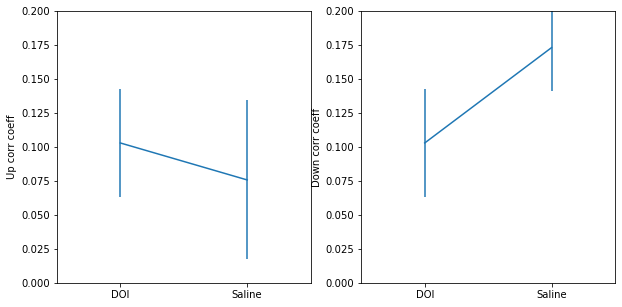

In [36]:
doi_upcorr = []
for index, row in doi_df.iterrows():
    up_pre = row['fm1_downsacc_avg_comp_dEye']
    up_post = row['fm2_downsacc_avg_comp_dEye']
    doi_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(doi_upcorr)

doi_downcorr = []
for index, row in doi_df.iterrows():
    down_pre = row['fm1_downsacc_avg_comp_dEye']
    down_post = row['fm2_downsacc_avg_comp_dEye']
    doi_downcorr.append(stats.pearsonr(down_pre,down_post)[0])
np.mean(doi_downcorr)

saline_upcorr = []
for index, row in saline_df.iterrows():
    up_pre = row['fm1_upsacc_avg_comp_dEye']
    up_post = row['fm2_upsacc_avg_comp_dEye']
    saline_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(saline_upcorr)

saline_downcorr = []
for index, row in saline_df.iterrows():
    down_pre = row['fm1_downsacc_avg_comp_dEye']
    down_post = row['fm2_downsacc_avg_comp_dEye']
    saline_downcorr.append(stats.pearsonr(down_pre,down_post)[0])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]
ax.errorbar([0,1],[np.mean(doi_upcorr),np.mean(saline_upcorr)],
             [np.std(doi_upcorr)/len(doi_upcorr),np.std(saline_upcorr)/len(saline_upcorr)])
ax.axis([-0.5,1.5,0,.2])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Up corr coeff')


ax = axs[1]
ax.errorbar([0,1],[np.mean(doi_downcorr),np.mean(saline_downcorr)],
             [np.std(doi_downcorr)/len(doi_downcorr),np.std(saline_downcorr)/len(saline_downcorr)])
ax.axis([-0.5,1.5,0,.2])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Down corr coeff')

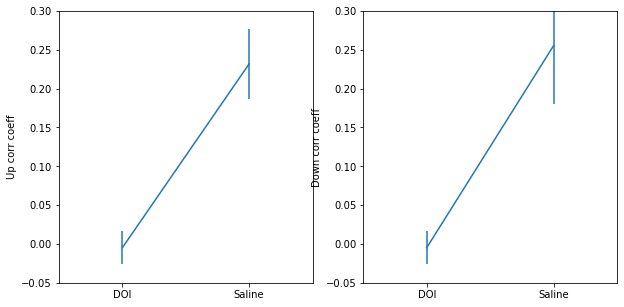

In [37]:
doi_upcorr = []
for index, row in doi_df.iterrows():
    up_pre = row['fm1_downsacc_avg']
    up_post = row['fm2_downsacc_avg']
    doi_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(doi_upcorr)

doi_downcorr = []
for index, row in doi_df.iterrows():
    down_pre = row['fm1_downsacc_avg']
    down_post = row['fm2_downsacc_avg']
    doi_downcorr.append(stats.pearsonr(down_pre,down_post)[0])
np.mean(doi_downcorr)

saline_upcorr = []
for index, row in saline_df.iterrows():
    up_pre = row['fm1_upsacc_avg']
    up_post = row['fm2_upsacc_avg']
    saline_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(saline_upcorr)

saline_downcorr = []
for index, row in saline_df.iterrows():
    down_pre = row['fm1_downsacc_avg']
    down_post = row['fm2_downsacc_avg']
    saline_downcorr.append(stats.pearsonr(down_pre,down_post)[0])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]
ax.errorbar([0,1],[np.mean(doi_upcorr),np.mean(saline_upcorr)],
             [np.std(doi_upcorr)/len(doi_upcorr),np.std(saline_upcorr)/len(saline_upcorr)])
ax.axis([-0.5,1.5,-.05,.3])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Up corr coeff')


ax = axs[1]
ax.errorbar([0,1],[np.mean(doi_downcorr),np.mean(saline_downcorr)],
             [np.std(doi_downcorr)/len(doi_downcorr),np.std(saline_downcorr)/len(saline_downcorr)])
ax.axis([-0.5,1.5,-.05,.3])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Down corr coeff')

plt.savefig('sac_avg_corr')

Text(0, 0.5, 'Down corr coeff')

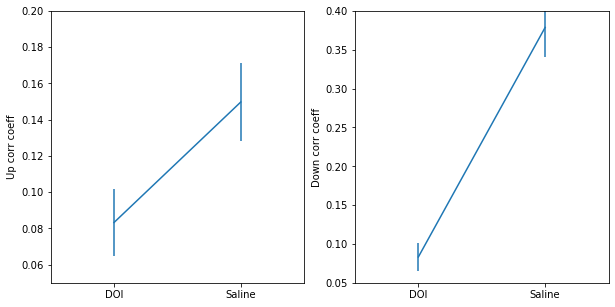

In [38]:
doi_upcorr = []
for index, row in doi_df.iterrows():
    up_pre = row['fm1_downsacc_avg_gaze_shift_dEye']
    up_post = row['fm2_downsacc_avg_gaze_shift_dEye']
    doi_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(doi_upcorr)

doi_downcorr = []
for index, row in doi_df.iterrows():
    down_pre = row['fm1_downsacc_avg_gaze_shift_dEye']
    down_post = row['fm2_downsacc_avg_gaze_shift_dEye']
    doi_downcorr.append(stats.pearsonr(down_pre,down_post)[0])
np.mean(doi_downcorr)

saline_upcorr = []
for index, row in saline_df.iterrows():
    up_pre = row['fm1_upsacc_avg_gaze_shift_dEye']
    up_post = row['fm2_upsacc_avg_gaze_shift_dEye']
    saline_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(saline_upcorr)

saline_downcorr = []
for index, row in saline_df.iterrows():
    down_pre = row['fm1_downsacc_avg_gaze_shift_dEye']
    down_post = row['fm2_downsacc_avg_gaze_shift_dEye']
    saline_downcorr.append(stats.pearsonr(down_pre,down_post)[0])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]
ax.errorbar([0,1],[np.mean(doi_upcorr),np.mean(saline_upcorr)],
             [np.std(doi_upcorr)/len(doi_upcorr),np.std(saline_upcorr)/len(saline_upcorr)])
           
ax.axis([-0.5,1.5,.05,.2])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Up corr coeff')


ax = axs[1]
ax.errorbar([0,1],[np.mean(doi_downcorr),np.mean(saline_downcorr)],
             [np.std(doi_downcorr)/len(doi_downcorr),np.std(saline_downcorr)/len(saline_downcorr)])
ax.axis([-0.5,1.5,.05,.4])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Down corr coeff')

Text(0, 0.5, 'Down corr coeff')

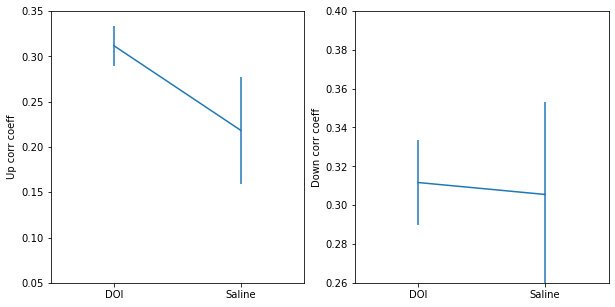

In [39]:
doi_upcorr = []
for index, row in doi_df.iterrows():
    up_pre = row['fm1_downsacc_avg_gaze_shift_dHead']
    up_post = row['fm2_downsacc_avg_gaze_shift_dHead']
    doi_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(doi_upcorr)

doi_downcorr = []
for index, row in doi_df.iterrows():
    down_pre = row['fm1_downsacc_avg_gaze_shift_dHead']
    down_post = row['fm2_downsacc_avg_gaze_shift_dHead']
    doi_downcorr.append(stats.pearsonr(down_pre,down_post)[0])
np.mean(doi_downcorr)

saline_upcorr = []
for index, row in saline_df.iterrows():
    up_pre = row['fm1_upsacc_avg_gaze_shift_dHead']
    up_post = row['fm2_upsacc_avg_gaze_shift_dHead']
    saline_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(saline_upcorr)

saline_downcorr = []
for index, row in saline_df.iterrows():
    down_pre = row['fm1_downsacc_avg_gaze_shift_dHead']
    down_post = row['fm2_downsacc_avg_gaze_shift_dHead']
    saline_downcorr.append(stats.pearsonr(down_pre,down_post)[0])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]
ax.errorbar([0,1],[np.mean(doi_upcorr),np.mean(saline_upcorr)],
             [np.std(doi_upcorr)/len(doi_upcorr),np.std(saline_upcorr)/len(saline_upcorr)])
ax.axis([-0.5,1.5,.05,.35])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Up corr coeff')


ax = axs[1]
ax.errorbar([0,1],[np.mean(doi_downcorr),np.mean(saline_downcorr)],
             [np.std(doi_downcorr)/len(doi_downcorr),np.std(saline_downcorr)/len(saline_downcorr)])
ax.axis([-0.5,1.5,.26,.4])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Down corr coeff')

Text(0, 0.5, 'Down corr coeff')

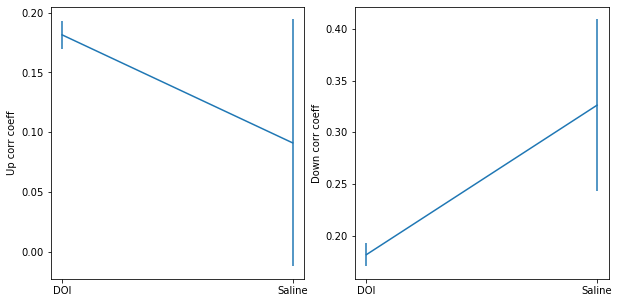

In [40]:

doi_upcorr = []
for index, row in doi_df.iterrows():
    up_pre = row['fm1_downsacc_avg_comp_dHead']
    up_post = row['fm2_downsacc_avg_comp_dHead']
    doi_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(doi_upcorr)

doi_downcorr = []
for index, row in doi_df.iterrows():
    down_pre = row['fm1_downsacc_avg_comp_dHead']
    down_post = row['fm2_downsacc_avg_comp_dHead']
    doi_downcorr.append(stats.pearsonr(down_pre,down_post)[0])
np.mean(doi_downcorr)

saline_upcorr = []
for index, row in saline_df.iterrows():
    up_pre = row['fm1_upsacc_avg_comp_dHead']
    up_post = row['fm2_upsacc_avg_comp_dHead']
    saline_upcorr.append(stats.pearsonr(up_pre,up_post)[0])
np.mean(saline_upcorr)

saline_downcorr = []
for index, row in saline_df.iterrows():
    down_pre = row['fm1_downsacc_avg_comp_dHead']
    down_post = row['fm2_downsacc_avg_comp_dHead']
    saline_downcorr.append(stats.pearsonr(down_pre,down_post)[0])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.ravel()

ax = axs[0]
ax.errorbar([0,1],[np.mean(doi_upcorr),np.mean(saline_upcorr)],
             [np.std(doi_upcorr)/len(doi_upcorr),np.std(saline_upcorr)/len(saline_upcorr)])

ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Up corr coeff')


ax = axs[1]
ax.errorbar([0,1],[np.mean(doi_downcorr),np.mean(saline_downcorr)],
             [np.std(doi_downcorr)/len(doi_downcorr),np.std(saline_downcorr)/len(saline_downcorr)])
ax.set_xticks([0,1])
ax.set_xticklabels(['DOI','Saline'])
ax.set_ylabel('Down corr coeff')